## League Of Legends Win Rate Classification Problem



![Alt text](./map.jpeg)

#### Understanding the Game
- This is a multiplayer 5v5 game where both teams have the same goal of destroying the "nexus", which is just a building in the base. Each team has to defend their own nexus and attack the enemies at the same time. There are also many towers to get through before reaching the nexus. There are a 162 league champions to pick from each with their own advantages and disadvantages. 
- The game rewards you with gold for destroying towers and killing your enemies. With gold you can buy items to make your champion stronger by providing bonus stats. 
- Champions can level up during the game by killing enemies which will allow them to unlock abilities and make them stronger. A level is nearly equivalent to 500 gold in stats.
```
    Gold -> Items -> Kills 
    Experience -> Levels -> Kills 
    Kills -> Gold 
```

- The area of the map in which a team does not have sight over is known as the Fog of War, a common hallmark of the RTS genre which is represented visually as a dark shroud over the terrain. Vision is the power to light up certain areas you choose in order to see everything that comes in contact with it. This can be created and controlled using items such as wards, trinkets and control wards. Using these items to attain vision will help yourself and your team to not get ambush by the enemy team, thus leading to less overall deaths.

```
    Wards -> Vision -> Avoiding Ganks (Dying less)
```

- The main goal of the game is to destroy the enemies nexus (base core), and in order to do that then Ally team must push at least 1 lane all the way through to the base. This requires destroying towers and inhibators. Although before 10 minutes, the game is setup so it's harder to push for towers as they have alot of Health and your champion does little damage. If a team is able to get a tower before this time it's a strong indicator that they are in the lead.

```
    Destroy Tower -> Destroy Inhibators -> Destroy Nexus -> Win Game
```

- Before 10 minutes there are also 2 different elite monsters, red brambleback and blue sentinel which provides the killer a temporary buff, a team could also take the dragon which provides extra stats and the rift herald which provides a team with gold stipend.


## 1) The Data Set

The goal for this dataset is to predict wether team blue would win in the first 10 minutes of a league of legends game. 

This dataset aims to predict the class attribute blueWins, and uses all other feature to predict this value. This is a binary classification, meaning blue team would either win or lose. 



## Import Libraries

In [224]:
import pandas as pd
import numpy as np

# Libraries to help with visualisation
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Show all attributes
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)
%matplotlib inline
sns.set_style('darkgrid')

print('Libraries Imported!')

Libraries Imported!


## 2) Raw Data Analysis


In [225]:
# Read into dataframe
df = pd.read_csv('inputs/high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [226]:
df.shape

(9879, 40)

Df has 9879 rows and 40 columns(attributes). Knowing this we can review it later on and examine which attributes will be necessary and the type of data manipulation that will be needed before creating our prediction model.

In [227]:
# Check for null values 
df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

## 3) Feature Engineering

##### Class Variable is "blueWins"

The first two features we can modify is the gameID, this provides our model with no significant or useful information to make a decision on the likelyhood of blue side winning the game. 

We will also move our blueWins attribute out of the column and place it into a variable "target". 

In [228]:
# store target variable in target
target = df.blueWins

# drop target and gameId
df.drop(['blueWins', 'gameId'], axis=1, inplace=True)
df.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


After Checking the bias balance on the dataset, it is well even at 50/50

Red Wins: 4949 (50.096%), Blue Wins: 4930(49.904%)


c:\Users\Jean\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


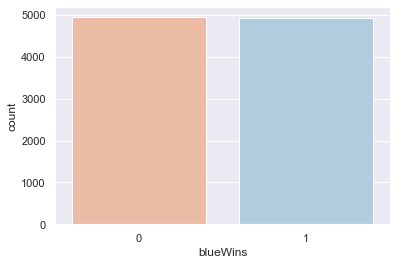

In [229]:
# check the balance of the data set
# visualize blueWins using countplot
sns.countplot(target, label='Count', palette='RdBu')
W, L = target.value_counts()

print('Red Wins: {} ({}%), Blue Wins: {}({}%)'.format(W,round(100*W/(W+L),3),L,round(100*L/(W+L),3)))


In [230]:
df.describe()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


As we can see from the table above, we have many columns which reference the same attributes but for both blue and red side. For example we have blueGoldDiff and redGoldDiff but these are always the same (the other one is just negative). This applies to redKills, redDeaths, redExperienceDiff.

There is also redFirstBlood and blueFirstBlood, if one of the teams gets the first blood (which gives more gold than a normal kill) it means the other team did not, this means that it's useless to have a column for both blue and red.

Lastly, the attributes that evaluate gold and cs per minute are not very useful either as we have the total cs given and we know that all the stats are up at the 10 minute mark. This shouldnt make a difference as it doesnt provide any information that isnt already given. We can see this lack of new information in the description above if we compare redTotalMinionsKilled column and the redCSPerMin column.

Below we will remove the attributes that we deemed not useful.

In [231]:
# drop not useful columns of blue and red team
columns =   ['blueGoldPerMin', 'blueCSPerMin','redGoldPerMin',
            'redKills', 'redDeaths','redGoldDiff',
            'redExperienceDiff', 'redFirstBlood','redCSPerMin',
            'redTotalGold','redTotalExperience', 'blueTotalGold',
            'blueTotalExperience']
df_clean = df.drop(columns, axis=1)

# Show new table
df_clean.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,28,2,1,9,6,11,0,0,0,0,6.6,195,36,643,-8,15,6,8,0,0,0,0,6.8,197,55
1,12,1,0,5,5,5,0,0,0,0,6.6,174,43,-2908,-1173,12,1,2,2,1,1,1,6.8,240,52
2,15,0,0,7,11,4,1,1,0,0,6.4,186,46,-1172,-1033,15,3,14,0,0,0,0,6.8,203,28
3,43,1,0,4,5,5,1,0,1,0,7.0,201,55,-1321,-7,15,2,10,0,0,0,0,7.0,235,47
4,75,4,0,6,6,6,0,0,0,0,7.0,210,57,-1004,230,17,2,7,1,1,0,0,7.0,225,67


### Explain how we do 4 here



In [232]:
# Copy attribute matrix and standardize it to compare all features at a even scale
data = df_clean.copy()
data_std = (data - data.mean()) / data.std()
data_std.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0.316980,-0.379256,0.990379,0.935254,-0.046924,1.071441,-0.879186,-0.753188,-0.481108,-0.210428,-1.035582,-0.992732,-1.465877,0.256215,0.013341,-0.399186,1.532415,0.329479,-0.914847,-0.838923,-0.436473,-0.198343,-0.410454,-0.928694,0.367666
1,-0.570963,-0.839026,-1.009612,-0.393196,-0.387777,-0.404748,-0.879186,-0.753188,-0.481108,-0.210428,-1.035582,-1.953459,-0.758684,-1.191194,-0.593312,-0.561723,-0.805829,-1.148130,2.277585,1.191884,2.290861,4.412078,-0.410454,1.033731,0.068500
2,-0.404474,-1.298797,-1.009612,0.271029,1.657340,-0.650779,0.719467,1.327556,-0.481108,-0.210428,-1.691007,-1.404472,-0.455601,-0.483590,-0.520410,-0.399186,0.129469,1.807089,-0.914847,-0.838923,-0.436473,-0.198343,-0.410454,-0.654867,-2.324826
3,1.149426,-0.839026,-1.009612,-0.725309,-0.387777,-0.404748,0.719467,-0.753188,2.078325,-0.210428,0.275266,-0.718238,0.453648,-0.544323,0.013862,-0.399186,-0.338180,0.822016,-0.914847,-0.838923,-0.436473,-0.198343,0.244615,0.805542,-0.430109
4,2.925312,0.540285,-1.009612,-0.061084,-0.046924,-0.158716,-0.879186,-0.753188,-0.481108,-0.210428,0.275266,-0.306498,0.655703,-0.415112,0.137276,-0.290829,-0.338180,0.083211,0.681369,1.191884,-0.436473,-0.198343,0.244615,0.349164,1.564329


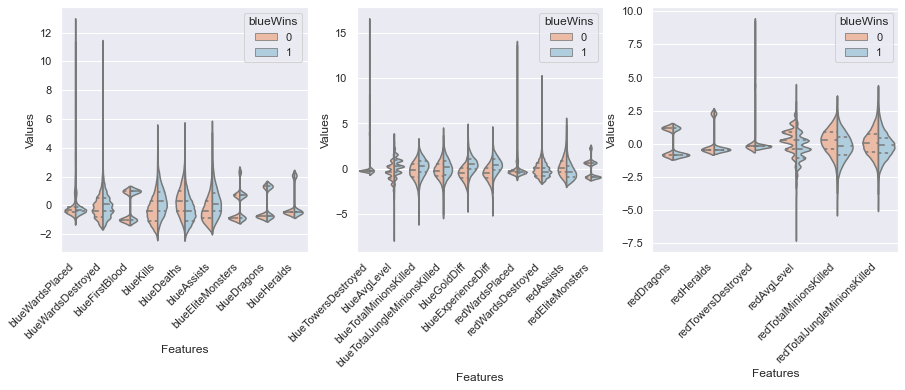

In [233]:

#We can determine which features the most important using a violin plot to compare the distribution of the feature values for each class.

data = df_clean.copy()
data_std = (data - data.mean()) / data.std()

data = pd.concat([target,data_std.iloc[:,0:9]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

fig, ax = plt.subplots(1,3,figsize=(15,5))

sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, split=True,
               inner='quart', ax=ax[0], palette='RdBu')
fig.autofmt_xdate(rotation=90)


data = pd.concat([target,data_std.iloc[:,9:19]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, split=True,
               inner='quart', ax=ax[1], palette='RdBu')
fig.autofmt_xdate(rotation=90)

data = pd.concat([target,data_std.iloc[:,19:29]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, split=True,
               inner='quart', ax=ax[2], palette='RdBu')
fig.autofmt_xdate(rotation=45)

plt.show()

Here we can see that BlueAvgLevel and RedAvgLevel does not provide any kind of useful information. There is no correlation with the class blueWins.

In [234]:
current_df =df_clean.drop(['blueAvgLevel','redAvgLevel'], axis=1).copy()
current_df.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,28,2,1,9,6,11,0,0,0,0,195,36,643,-8,15,6,8,0,0,0,0,197,55
1,12,1,0,5,5,5,0,0,0,0,174,43,-2908,-1173,12,1,2,2,1,1,1,240,52
2,15,0,0,7,11,4,1,1,0,0,186,46,-1172,-1033,15,3,14,0,0,0,0,203,28
3,43,1,0,4,5,5,1,0,1,0,201,55,-1321,-7,15,2,10,0,0,0,0,235,47
4,75,4,0,6,6,6,0,0,0,0,210,57,-1004,230,17,2,7,1,1,0,0,225,67


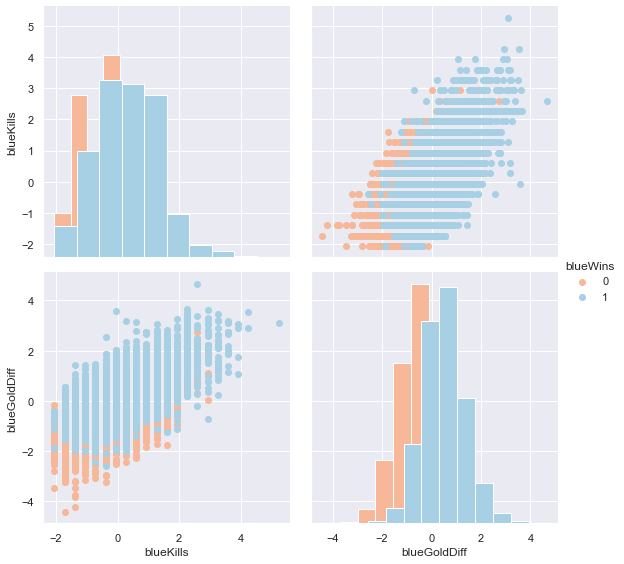

In [235]:
data = current_df.copy()
data_std = (data - data.mean()) / data.std()

data = pd.concat([target,data_std], axis=1)
g = sns.PairGrid(data=data, vars=['blueKills', 'blueGoldDiff'], hue='blueWins', height=4, palette='RdBu')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

By examining the Violent graph, we've determined that there are a lot of co-linearity between the features.

### Gold And Experience Analysis 

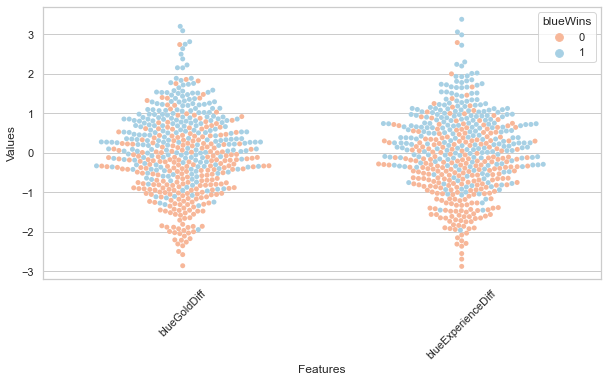

In [236]:
# analyze the correlation between the features gold difference and experience difference

sns.set(style='whitegrid', palette='muted')

data = current_df[['blueGoldDiff', 'blueExperienceDiff']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([target, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10,10))
sns.swarmplot(x='Features', y='Values', hue='blueWins', palette='RdBu', data=data)
plt.xticks(rotation=45)
plt.show()

In [237]:
columns = []
current_df.drop(columns, axis=1, inplace=True)

# we can now rename blueGoldDiff and blueExperienceDiff to goldDiff and experienceDiff
current_df.rename(columns={'blueGoldDiff':'goldDiff', 'blueExperienceDiff':'experienceDiff'}, inplace=True)
current_df.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,goldDiff,experienceDiff,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,28,2,1,9,6,11,0,0,0,0,195,36,643,-8,15,6,8,0,0,0,0,197,55
1,12,1,0,5,5,5,0,0,0,0,174,43,-2908,-1173,12,1,2,2,1,1,1,240,52
2,15,0,0,7,11,4,1,1,0,0,186,46,-1172,-1033,15,3,14,0,0,0,0,203,28
3,43,1,0,4,5,5,1,0,1,0,201,55,-1321,-7,15,2,10,0,0,0,0,235,47
4,75,4,0,6,6,6,0,0,0,0,210,57,-1004,230,17,2,7,1,1,0,0,225,67


### Elite Monster Analysis
In this Dataset there are two type of elite monster, the herald and the dragon. Killing these elites will give buffs and or support to the team that defeates them, which will greatly help later on the game. After analysing the weight of the dragonDiff, heraldDiff and eliteDiff, we've came to the following conclusion:

>  - Blue team has a 64% chance of winning if they are ahead in dragon kills before 10 min, 50% chance if equal on dragon kills and 37% if red team is ahead in kills
>  - Blue team has a 60% chance of winning if they are ahead in herald kills before 10 min, 49% chance if equal on dragon kills and 38% if red team is ahead in kills

The EliteDiff feature is a combination of both dragon and herald, we'll keep the diff feature and remove the rest.

In [238]:
current_df['dragonsDiff'] = current_df['blueDragons'] - current_df['redDragons']
current_df['heraldsDiff'] = current_df['blueHeralds'] - current_df['redHeralds']
current_df['eliteDiff'] = current_df['blueEliteMonsters'] - current_df['redEliteMonsters']

data = pd.concat([target, current_df], axis=1)

eliteGroups = data.groupby(['eliteDiff'])['blueWins'].mean()
dragonGroups = data.groupby(['dragonsDiff'])['blueWins'].mean()
heraldGroups = data.groupby(['heraldsDiff'])['blueWins'].mean()

print(eliteGroups)
print(dragonGroups)
print(heraldGroups)

eliteDiff
-2    0.286301
-1    0.368772
 0    0.500683
 1    0.632093
 2    0.735211
Name: blueWins, dtype: float64
dragonsDiff
-1    0.374173
 0    0.500000
 1    0.640940
Name: blueWins, dtype: float64
heraldsDiff
-1    0.387729
 0    0.498680
 1    0.595046
Name: blueWins, dtype: float64


### Towers Destruction Analysis
In order for blue team to win the game, they must destroy a certain amount of towers to reach the nexus. Having these towers destroy in early game (first 10 min), could be heavily influential for the outcome of the game.

It is however very unlikely that a tower could be destroyed in the first 10 minutes of the game, since it requires a lot dps (damage per second). And this could only happen if the team is stream rolling (thus creating a correlation with gold and kills).

In [239]:
# Drop unnecessary features
columns = ['blueEliteMonsters','blueDragons','blueHeralds','redEliteMonsters','redDragons','redHeralds']
current_df.drop(columns, axis=1, inplace=True)

towerDiff
-2    0.185185
-1    0.216138
 0    0.498124
 1    0.741379
 2    0.964286
 3    1.000000
 4    1.000000
Name: blueWins, dtype: float64


Text(35.49416875332159, 0.5, 'Ratio')

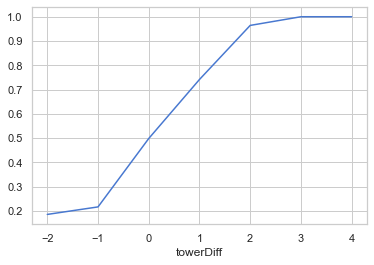

In [240]:
current_df['towerDiff'] = current_df['blueTowersDestroyed'] - current_df['redTowersDestroyed']
data = pd.concat([target, current_df], axis=1)

towerGroup = data.groupby(['towerDiff'])['blueWins'].mean()
print(towerGroup)

plt.plot(figsize=(15,5))
towerGroup.plot(kind='line')
ax[0].set_title('Ratio Blue Wins')
ax[0].set_ylabel('Ratio')



In [241]:
columns = ['blueTowersDestroyed','redTowersDestroyed']
current_df.drop(columns, axis=1, inplace=True)

### Kill, Assist And Death Analysis


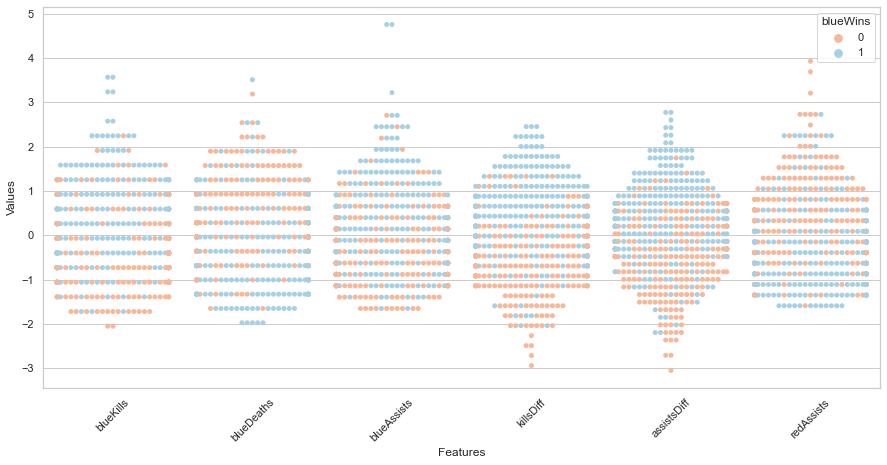

In [242]:
current_df['killsDiff'] = current_df['blueKills'] - current_df['blueDeaths']
current_df['assistsDiff'] = current_df['blueAssists'] - current_df['redAssists']

sns.set(style='whitegrid', palette='muted')

data = current_df[['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists']].sample(500)
data_std = (data - data.mean()) / data.std()
data = pd.concat([target, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(15,7))
sns.swarmplot(x='Features', y='Values', hue='blueWins', palette='RdBu', data=data)
plt.xticks(rotation=45)
plt.show()

We notice that the graph with the best correlation is the killsDiff that is proportional to assistDiff. When compare with the blue kills proportional to blue assists graph, we notice that they have the same form but the differential graph is much more dense and compact. Thus, for the prediction model, it is best to use the differential features.

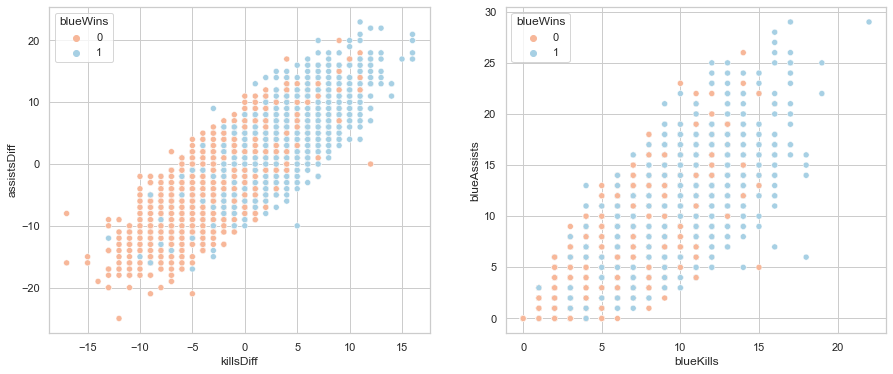

In [243]:
data = pd.concat([target, current_df], axis=1)

fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.scatterplot(x='killsDiff', y='assistsDiff', hue='blueWins', palette='RdBu', data=data, ax=ax[0])

sns.scatterplot(x='blueKills', y='blueAssists', hue='blueWins', palette='RdBu', data=data, ax=ax[1])
plt.show()

In [244]:
# Drop unnecessary features
columns = ['blueFirstBlood','blueKills','blueDeaths','blueAssists','redAssists']
current_df.drop(columns, axis=1, inplace=True)

### Minion Kills Analysis


In [245]:
sns.set(style='whitegrid', palette='muted')

current_df['minionKilledDiff'] = current_df['blueTotalMinionsKilled'] - current_df['redTotalMinionsKilled']
current_df['jungleMinionKilledDiff'] = current_df['blueTotalJungleMinionsKilled'] - current_df['redTotalJungleMinionsKilled']

# Drop unnecessary features
column = ['blueTotalMinionsKilled','redTotalMinionsKilled','blueTotalJungleMinionsKilled','redTotalJungleMinionsKilled']

current_df.drop(column, axis=1, inplace=True)
data = current_df[['minionKilledDiff', 'jungleMinionKilledDiff']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([target, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features',value_name='Values')

plt.figure(figsize=(20,8))
sns.swarmplot(x='Features', y='Values', hue='blueWins', palette='RdBu', data=data)
plt.xticks(rotation=45)
plt.show()

> - We notice that there is a small corellation between minion Kills and blueWins, thus we can use the minionKilledDiff feature and remove the red and blue total minion killed features.
> - We notice that there is no corellation between jungle minion kills and blue wins, the dots are randomly place and show no pattern. Thus we can remove any feature related to jungle minions

In [ ]:
column = ['jungleMinionKilledDiff']

current_df.drop(column, axis=1, inplace=True)

#### Correlation
Now lets create the correlation-matrix and find all feature that has a correlation higher then 0.2 or lower then -0.2. We exclude everything else  since they are redundant and has no effect on the prediction.

<AxesSubplot:>

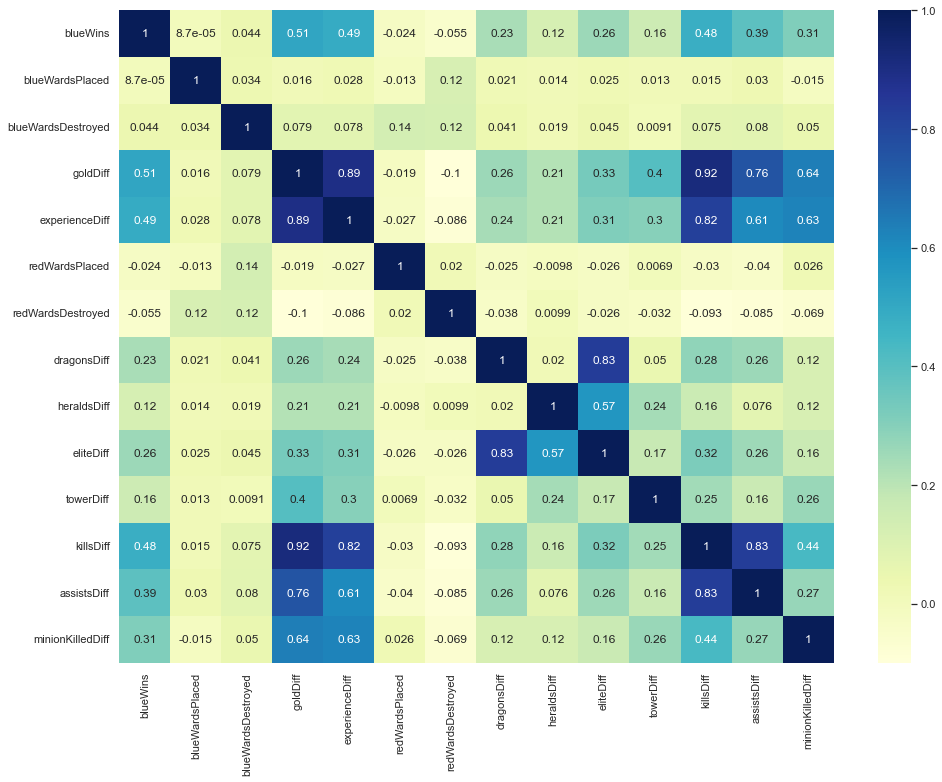

In [ ]:
plt.figure(figsize=(16, 12))
data = pd.concat([target, current_df], axis=1)

sns.heatmap(data.corr(), cmap='YlGnBu', annot=True )

In [ ]:
# find all column that have correlation greater than 0.2 or less than -0.2
data = pd.concat([target, current_df], axis=1)
corr_list = round(data.corr().blueWins,2)
corr_list = corr_list[(corr_list > 0.2) | (corr_list < -0.2)]
cols = []
# append the column name to cols
for i in corr_list.index:
    cols.append(i)
cols.remove('blueWins')
corr_list

blueWins            1.00
goldDiff            0.51
experienceDiff      0.49
dragonsDiff         0.23
eliteDiff           0.26
killsDiff           0.48
assistsDiff         0.39
minionKilledDiff    0.31
Name: blueWins, dtype: float64

In [ ]:
# drop columns that have correlation less than 0.2 or greater than -0.2
features = current_df[cols]
features.head()

,goldDiff,experienceDiff,dragonsDiff,eliteDiff,killsDiff,assistsDiff,minionKilledDiff
0,643,-8,0,0,3,3,-2
1,-2908,-1173,-1,-2,0,3,-66
2,-1172,-1033,1,1,-4,-10,-17
3,-1321,-7,0,1,-1,-5,-34
4,-1004,230,-1,-1,0,-1,-15


This will be our final list of feature that we will use to machine learn


## Lets Machine Learn


In [ ]:
# Import libraries for machine learning models
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


print('Machine Learning Libraries Imported!')

Machine Learning Libraries Imported!


In [ ]:
print(features.shape,target.shape)

(9879, 7) (9879,)


### 5) Preparing the data

In [ ]:
features = preprocessing.StandardScaler().fit(features).transform(features.astype(float))

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)



Train set: (7903, 7) (7903,)
Test set: (1976, 7) (1976,)
Train set: (7903, 7) (7903,)
Test set: (1976, 7) (1976,)
Train set: (7903, 7) (7903,)
Test set: (1976, 7) (1976,)


In [ ]:
#create a table to store the accuracy of the models; algorithm, accuracy, recall, precision, f_score

models = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Recall', 'Precision', 'F_score'])

In [ ]:
# get confusion matrix 
def get_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    return cm

def get_accuracy(y_test, y_pred):
    return metrics.accuracy_score(y_test, y_pred)

def get_recall(y_test, y_pred):
    return metrics.recall_score(y_test, y_pred)

def get_precision(y_test, y_pred):
    return metrics.precision_score(y_test, y_pred)

def get_f_score(y_test, y_pred):
    return metrics.f1_score(y_test, y_pred)

def get_metrics(algorithm, y_test, y_pred):
    accuracy = get_accuracy(y_test, y_pred)
    recall = get_recall(y_test, y_pred)
    precision = get_precision(y_test, y_pred)
    f_score = get_f_score(y_test, y_pred)
    return algorithm, accuracy, recall, precision, f_score


### Naive Bayes


In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
# Call confusion matrix and accuracy
algorithm, accuracy, recall, precision, f_score = get_metrics('Bayes', y_pred, y_test)

models = models.append({'Algorithm': algorithm, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F_score': f_score}, ignore_index=True)


C:\Users\Jean\AppData\Local\Temp\ipykernel_22336\1679590548.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append({'Algorithm': algorithm, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F_score': f_score}, ignore_index=True)


### Logistic Regression

In [ ]:
# Train and predict logistic regression model
LR = LogisticRegression(C=0.01, solver='liblinear')
y_pred = LR.fit(X_train,y_train).predict(X_test)

In [ ]:
algorithm, accuracy, recall, precision, f_score = get_metrics('LogReg', y_pred, y_test)

models = models.append({'Algorithm': algorithm, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F_score': f_score}, ignore_index=True)


C:\Users\Jean\AppData\Local\Temp\ipykernel_22336\1914544218.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append({'Algorithm': algorithm, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F_score': f_score}, ignore_index=True)


#### Multi-layer Perceptron

In [ ]:
# Train and predict multi-layer perceptron model
MLP = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
y_pred = MLP.fit(X_train,y_train).predict(X_test)


In [ ]:
algorithm, accuracy, recall, precision, f_score = get_metrics('MLP', y_pred, y_test)

models = models.append({'Algorithm': algorithm, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F_score': f_score}, ignore_index=True)


C:\Users\Jean\AppData\Local\Temp\ipykernel_22336\108773883.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append({'Algorithm': algorithm, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F_score': f_score}, ignore_index=True)


In [ ]:
models

,Algorithm,Accuracy,Recall,Precision,F_score
0,Bayes,0.734818,0.736153,0.736153,0.736153
1,LogReg,0.732794,0.732268,0.738167,0.735206
2,MLP,0.725709,0.72709,0.72709,0.72709
